<a href="https://colab.research.google.com/github/Gial88/skripsi-gial/blob/main/CodeCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/skripsi/data'

In [3]:
#pip install split-folders tqdm

In [4]:
#import splitfolders

In [5]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib

In [6]:
train_dir = data_dir+'/train'
val_dir = data_dir+'/val'
test_dir = data_dir+'/test'
os.listdir(train_dir)

['normal', 'cataract']

In [7]:
class_name = ['cataract','normal']
class_name

['cataract', 'normal']

In [24]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=(0.8,1.2),
                    zoom_range=(0.5,1.0),
                    fill_mode='nearest',
                    )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [75]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 746 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


Ukuran gambar : (32, 150, 150, 3)


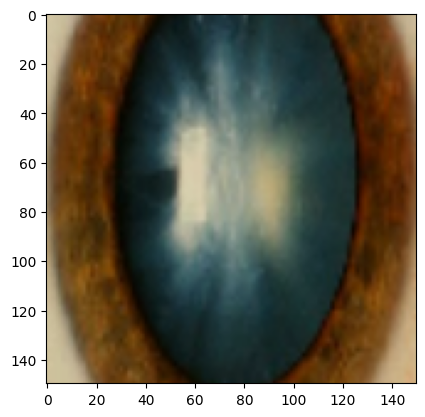

Ukuran gambar : (32, 150, 150, 3)


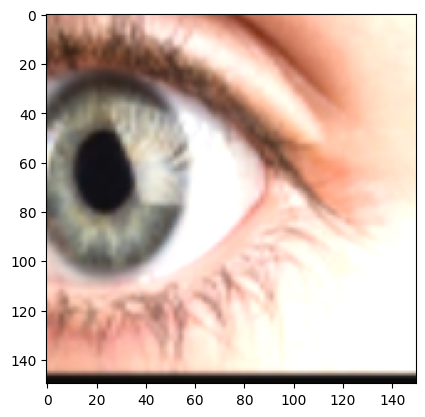

Ukuran gambar : (32, 150, 150, 3)


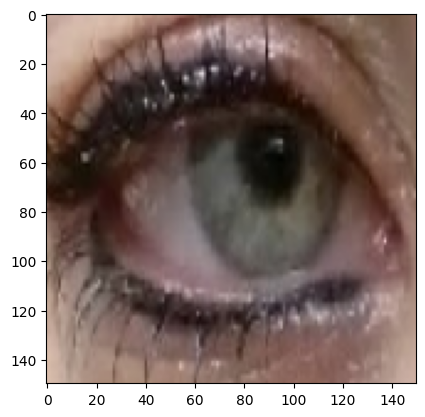

Ukuran gambar : (32, 150, 150, 3)


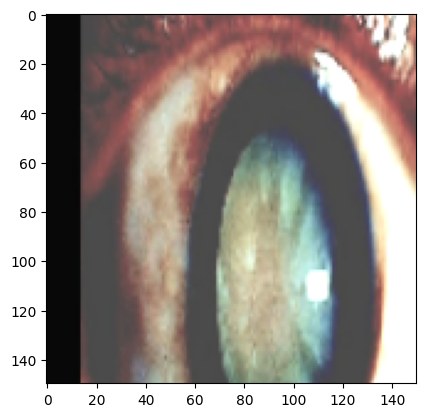

In [76]:
for i in range(4):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)
  plt.imshow(img[i])
  plt.show()

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [94]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 17, 17, 128)     

In [95]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

In [96]:
hasil = model.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
24/24 [==============================] - 21s 822ms/step - loss: 0.7113 - accuracy: 0.5590 - val_loss: 0.6193 - val_accuracy: 0.6604
Epoch 2/15
24/24 [==============================] - 19s 772ms/step - loss: 0.5344 - accuracy: 0.7346 - val_loss: 0.5943 - val_accuracy: 0.6792
Epoch 3/15
24/24 [==============================] - 19s 788ms/step - loss: 0.4613 - accuracy: 0.7802 - val_loss: 0.5217 - val_accuracy: 0.7264
Epoch 4/15
24/24 [==============================] - 19s 782ms/step - loss: 0.4288 - accuracy: 0.8123 - val_loss: 0.5605 - val_accuracy: 0.7170
Epoch 5/15
24/24 [==============================] - 19s 774ms/step - loss: 0.3950 - accuracy: 0.8190 - val_loss: 0.5041 - val_accuracy: 0.7453
Epoch 6/15
24/24 [==============================] - 19s 790ms/step - loss: 0.3812 - accuracy: 0.8311 - val_loss: 0.4765 - val_accuracy: 0.7547
Epoch 7/15
24/24 [==============================] - 19s 784ms/step - loss: 0.3458 - accuracy: 0.8324 - val_loss: 0.4246 - val_accuracy: 0.7830

In [98]:
model.save("Model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
test_evaluate = model.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

7/7 [==============================] - 5s 731ms/step - loss: 0.2821 - accuracy: 0.8645
Test loss     : 0.28206250071525574
Test accuracy : 0.86


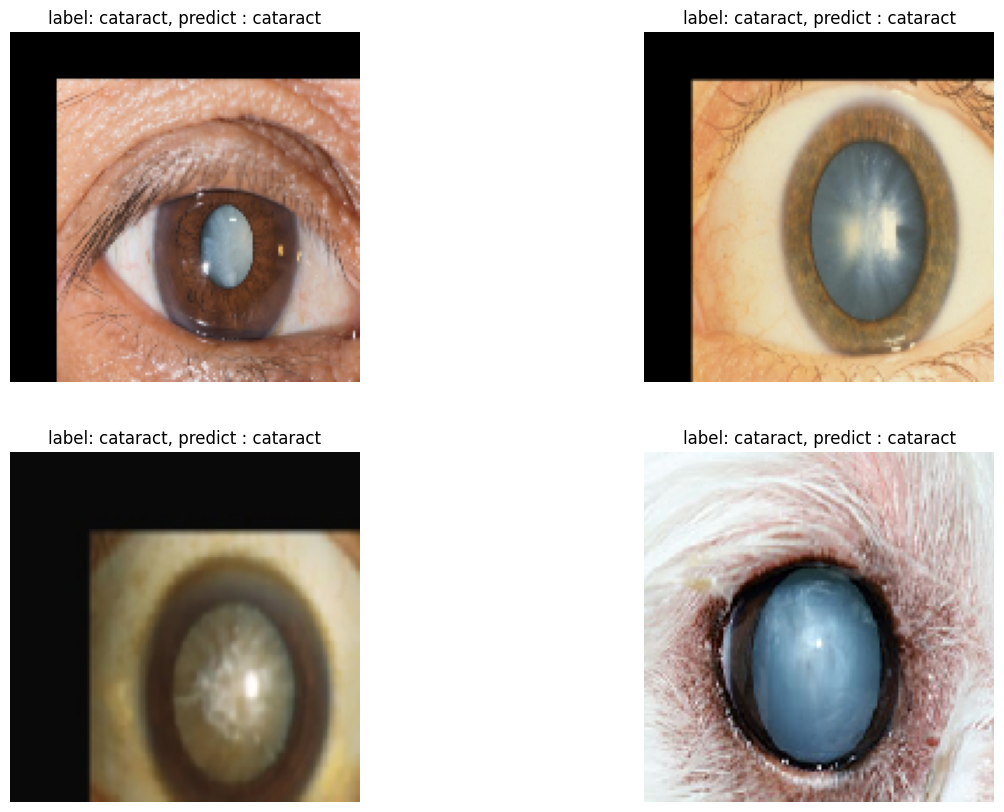

In [99]:
 image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(4) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(2,2,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

In [100]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)

7/7 [==============================] - 5s 729ms/step


In [101]:
y_pred = (y_pred > 0.5).astype(int).ravel()

In [102]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

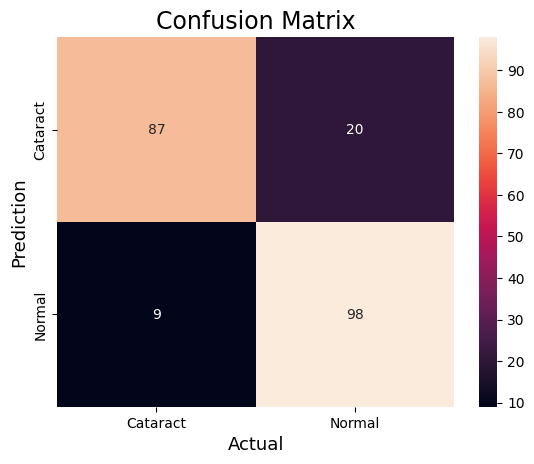

In [103]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cataract','Normal'],
            yticklabels=['Cataract','Normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

plt.show()

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       107
           1       0.83      0.92      0.87       107

    accuracy                           0.86       214
   macro avg       0.87      0.86      0.86       214
weighted avg       0.87      0.86      0.86       214

